The dataset *weight-height.csv* includes weight & height of 10000 people with their gender. We want to create a classifier to predict genders based on two features of weight and height. Logistic Regression is the classification algorithm we want to use here.

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Q2

Load the csv file and visualize a scatter plot of weight vs height of this 10000 people, show genders with different colors on the plot 

In [4]:
weight_height=pd.read_csv('weight-height.csv')
weight_height

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<AxesSubplot:xlabel='Weight', ylabel='Height'>

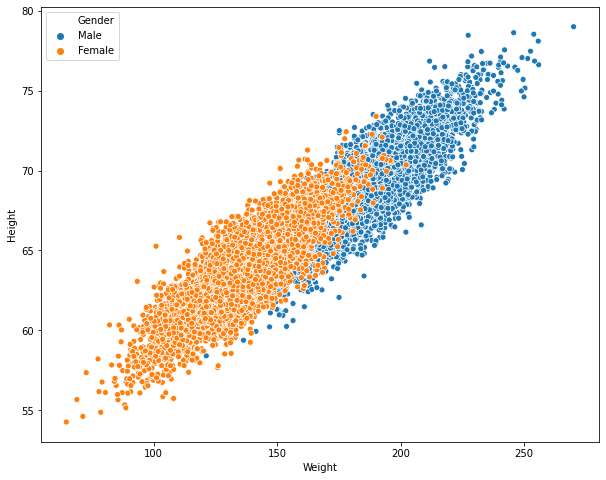

In [11]:
fig,ax=plt.subplots()
fig.set_size_inches(10,8)
sns.scatterplot(x='Weight',y='Height',hue='Gender',data=weight_height)

### Q2

Split the data into train and test (80% and 20%). 

Next, create a logistic regression model and fit the training data to this model. 

Then, predict the test data, using *predict* method. 

Finally, using *predict_proba* method, print what is the probability of each testing instance belonging to each class?

Using result from *predict_proba* and result from *predict* method, can you guess what is the default threshold for *predict* method?

In [13]:
X=weight_height.iloc[:,1:]
y=weight_height.iloc[:,0]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [16]:
model=LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(y_pred)

['Male' 'Male' 'Female' ... 'Male' 'Female' 'Female']


In [17]:
print(model.predict_proba(X_test))

[[2.32140142e-03 9.97678599e-01]
 [2.13219105e-04 9.99786781e-01]
 [9.99762091e-01 2.37909144e-04]
 ...
 [3.35866318e-03 9.96641337e-01]
 [9.99796497e-01 2.03503050e-04]
 [5.95005891e-01 4.04994109e-01]]


### Since the result of y_pred is in consistent of the preict_proba method, I guess the default threshold for predict method is the same as that of predict_proba method, which is 0.5

### Q3

Using *metrics.plot_roc_curve* method in sklearn create a plot showing ROC curve.

What is the Area Under the Curve (AUC)?

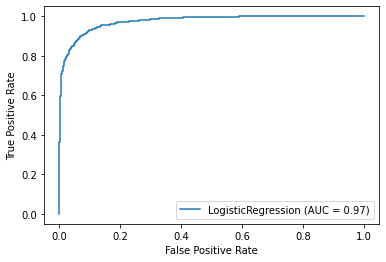

In [32]:
metrics.plot_roc_curve(model,X_test,y_test)
plt.show()

### The area under the curve is 0.97.

### Q4

Using *metrics.roc_curve* method in sklearn, find out what are different fpr, tpr, and associated thresholds for the plot's points in previous question.

What is the best True Positive Rate (TPR), assuming the maximum acceptable False Positive Rate (FPR) would be 0.1?

What if the maximum acceptable FPR would be 0.05?

In [35]:
y_pred

array(['Male', 'Male', 'Female', ..., 'Male', 'Female', 'Female'],
      dtype=object)

In [39]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,model.predict_proba(X_test)[:,1],pos_label='Male')

### 1. The value of fpr, tpr and thresholds

In [54]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.94035785e-04,
       9.94035785e-04, 1.98807157e-03, 1.98807157e-03, 2.98210736e-03,
       2.98210736e-03, 3.97614314e-03, 3.97614314e-03, 4.97017893e-03,
       4.97017893e-03, 5.96421471e-03, 5.96421471e-03, 6.95825050e-03,
       6.95825050e-03, 7.95228628e-03, 7.95228628e-03, 8.94632207e-03,
       8.94632207e-03, 9.94035785e-03, 9.94035785e-03, 1.09343936e-02,
       1.09343936e-02, 1.19284294e-02, 1.19284294e-02, 1.29224652e-02,
       1.29224652e-02, 1.39165010e-02, 1.39165010e-02, 1.49105368e-02,
       1.49105368e-02, 1.59045726e-02, 1.59045726e-02, 1.68986083e-02,
       1.68986083e-02, 1.78926441e-02, 1.78926441e-02, 1.88866799e-02,
       1.88866799e-02, 2.08747515e-02, 2.08747515e-02, 2.18687873e-02,
       2.18687873e-02, 2.28628231e-02, 2.28628231e-02, 2.38568588e-02,
       2.38568588e-02, 2.58449304e-02, 2.58449304e-02, 2.78330020e-02,
       2.78330020e-02, 2.98210736e-02, 2.98210736e-02, 3.08151093e-02,
      

In [52]:
tpr

array([0.        , 0.00100604, 0.36619718, 0.36619718, 0.47183099,
       0.47183099, 0.57042254, 0.57042254, 0.59657948, 0.59657948,
       0.65492958, 0.65492958, 0.68913481, 0.68913481, 0.69014085,
       0.69014085, 0.70623742, 0.70623742, 0.70724346, 0.70724346,
       0.71730382, 0.71730382, 0.72132797, 0.72132797, 0.72535211,
       0.72535211, 0.72837022, 0.72837022, 0.74748491, 0.74748491,
       0.75452716, 0.75452716, 0.76458753, 0.76458753, 0.77263581,
       0.77263581, 0.77464789, 0.77464789, 0.77565392, 0.77565392,
       0.78571429, 0.78571429, 0.79074447, 0.79074447, 0.79476861,
       0.79476861, 0.79577465, 0.79577465, 0.80080483, 0.80080483,
       0.80583501, 0.80583501, 0.80985915, 0.80985915, 0.81086519,
       0.81086519, 0.8138833 , 0.8138833 , 0.81690141, 0.81690141,
       0.82897384, 0.82897384, 0.82997988, 0.82997988, 0.83199195,
       0.83199195, 0.83400402, 0.83400402, 0.8360161 , 0.8360161 ,
       0.83702213, 0.83702213, 0.84305835, 0.84305835, 0.84607

In [53]:
thresholds

array([1.99999977e+00, 9.99999773e-01, 9.92200394e-01, 9.92113548e-01,
       9.82775030e-01, 9.82680547e-01, 9.67852433e-01, 9.67378692e-01,
       9.58148190e-01, 9.58109230e-01, 9.38709629e-01, 9.38565131e-01,
       9.23652150e-01, 9.23349382e-01, 9.23288478e-01, 9.22873032e-01,
       9.13883635e-01, 9.13855066e-01, 9.13825834e-01, 9.13755907e-01,
       9.06274813e-01, 9.06241203e-01, 9.05118650e-01, 9.04729211e-01,
       9.02675898e-01, 9.00849901e-01, 8.96434935e-01, 8.96341866e-01,
       8.83587329e-01, 8.82797588e-01, 8.76926965e-01, 8.76726247e-01,
       8.62129892e-01, 8.60886446e-01, 8.51670534e-01, 8.49903023e-01,
       8.46136901e-01, 8.44907373e-01, 8.44069477e-01, 8.41696464e-01,
       8.25191344e-01, 8.23310119e-01, 8.20066781e-01, 8.19514714e-01,
       8.12106127e-01, 8.12102215e-01, 8.08983108e-01, 8.08529311e-01,
       7.95860224e-01, 7.94635056e-01, 7.87498966e-01, 7.86883993e-01,
       7.84162539e-01, 7.82122947e-01, 7.78567516e-01, 7.75987679e-01,
      

### 2.FPR<=0.1

In [49]:
fpr[fpr<=0.1]

array([0.        , 0.        , 0.        , 0.00099404, 0.00099404,
       0.00198807, 0.00198807, 0.00298211, 0.00298211, 0.00397614,
       0.00397614, 0.00497018, 0.00497018, 0.00596421, 0.00596421,
       0.00695825, 0.00695825, 0.00795229, 0.00795229, 0.00894632,
       0.00894632, 0.00994036, 0.00994036, 0.01093439, 0.01093439,
       0.01192843, 0.01192843, 0.01292247, 0.01292247, 0.0139165 ,
       0.0139165 , 0.01491054, 0.01491054, 0.01590457, 0.01590457,
       0.01689861, 0.01689861, 0.01789264, 0.01789264, 0.01888668,
       0.01888668, 0.02087475, 0.02087475, 0.02186879, 0.02186879,
       0.02286282, 0.02286282, 0.02385686, 0.02385686, 0.02584493,
       0.02584493, 0.027833  , 0.027833  , 0.02982107, 0.02982107,
       0.03081511, 0.03081511, 0.03180915, 0.03180915, 0.03280318,
       0.03280318, 0.03379722, 0.03379722, 0.03479125, 0.03479125,
       0.03578529, 0.03578529, 0.03677932, 0.03677932, 0.03777336,
       0.03777336, 0.0387674 , 0.0387674 , 0.03976143, 0.03976

In [50]:
tpr[fpr<=0.1]

array([0.        , 0.00100604, 0.36619718, 0.36619718, 0.47183099,
       0.47183099, 0.57042254, 0.57042254, 0.59657948, 0.59657948,
       0.65492958, 0.65492958, 0.68913481, 0.68913481, 0.69014085,
       0.69014085, 0.70623742, 0.70623742, 0.70724346, 0.70724346,
       0.71730382, 0.71730382, 0.72132797, 0.72132797, 0.72535211,
       0.72535211, 0.72837022, 0.72837022, 0.74748491, 0.74748491,
       0.75452716, 0.75452716, 0.76458753, 0.76458753, 0.77263581,
       0.77263581, 0.77464789, 0.77464789, 0.77565392, 0.77565392,
       0.78571429, 0.78571429, 0.79074447, 0.79074447, 0.79476861,
       0.79476861, 0.79577465, 0.79577465, 0.80080483, 0.80080483,
       0.80583501, 0.80583501, 0.80985915, 0.80985915, 0.81086519,
       0.81086519, 0.8138833 , 0.8138833 , 0.81690141, 0.81690141,
       0.82897384, 0.82897384, 0.82997988, 0.82997988, 0.83199195,
       0.83199195, 0.83400402, 0.83400402, 0.8360161 , 0.8360161 ,
       0.83702213, 0.83702213, 0.84305835, 0.84305835, 0.84607

### The best True Positive Rate (TPR) assuming maximum FPR is 0.1 would be 0.92957746.

### 3. FPR<=0.05

In [58]:
fpr[fpr<=0.05]

array([0.        , 0.        , 0.        , 0.00099404, 0.00099404,
       0.00198807, 0.00198807, 0.00298211, 0.00298211, 0.00397614,
       0.00397614, 0.00497018, 0.00497018, 0.00596421, 0.00596421,
       0.00695825, 0.00695825, 0.00795229, 0.00795229, 0.00894632,
       0.00894632, 0.00994036, 0.00994036, 0.01093439, 0.01093439,
       0.01192843, 0.01192843, 0.01292247, 0.01292247, 0.0139165 ,
       0.0139165 , 0.01491054, 0.01491054, 0.01590457, 0.01590457,
       0.01689861, 0.01689861, 0.01789264, 0.01789264, 0.01888668,
       0.01888668, 0.02087475, 0.02087475, 0.02186879, 0.02186879,
       0.02286282, 0.02286282, 0.02385686, 0.02385686, 0.02584493,
       0.02584493, 0.027833  , 0.027833  , 0.02982107, 0.02982107,
       0.03081511, 0.03081511, 0.03180915, 0.03180915, 0.03280318,
       0.03280318, 0.03379722, 0.03379722, 0.03479125, 0.03479125,
       0.03578529, 0.03578529, 0.03677932, 0.03677932, 0.03777336,
       0.03777336, 0.0387674 , 0.0387674 , 0.03976143, 0.03976

In [59]:
tpr[fpr<=0.05]

array([0.        , 0.00100604, 0.36619718, 0.36619718, 0.47183099,
       0.47183099, 0.57042254, 0.57042254, 0.59657948, 0.59657948,
       0.65492958, 0.65492958, 0.68913481, 0.68913481, 0.69014085,
       0.69014085, 0.70623742, 0.70623742, 0.70724346, 0.70724346,
       0.71730382, 0.71730382, 0.72132797, 0.72132797, 0.72535211,
       0.72535211, 0.72837022, 0.72837022, 0.74748491, 0.74748491,
       0.75452716, 0.75452716, 0.76458753, 0.76458753, 0.77263581,
       0.77263581, 0.77464789, 0.77464789, 0.77565392, 0.77565392,
       0.78571429, 0.78571429, 0.79074447, 0.79074447, 0.79476861,
       0.79476861, 0.79577465, 0.79577465, 0.80080483, 0.80080483,
       0.80583501, 0.80583501, 0.80985915, 0.80985915, 0.81086519,
       0.81086519, 0.8138833 , 0.8138833 , 0.81690141, 0.81690141,
       0.82897384, 0.82897384, 0.82997988, 0.82997988, 0.83199195,
       0.83199195, 0.83400402, 0.83400402, 0.8360161 , 0.8360161 ,
       0.83702213, 0.83702213, 0.84305835, 0.84305835, 0.84607

### The best True Positive Rate (TPR) is 0.85814889 when the maximum FPR is 0.05